# The Iris dataset in scikit-learn
## Exploratory Data Analysis

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
# Sci-kit Learn is a free software
# machine learning library for Python
# the iris dataset is built-in
iris = datasets.load_iris()

# the dataset is a Bunch object
# A Bunch object uses a Python dict like object
# with attribute style access like Javascript
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# the data and target are both numpy arrays
# unlike Python lists, numpy arrays 
# all have the same data type 
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
# the dataset has 150 samples (rows)
# 4 features: petal length and width
# and sepal length and width 
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data
y = iris.target

In [8]:
# create a DataFrame with the data
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Visual EDA

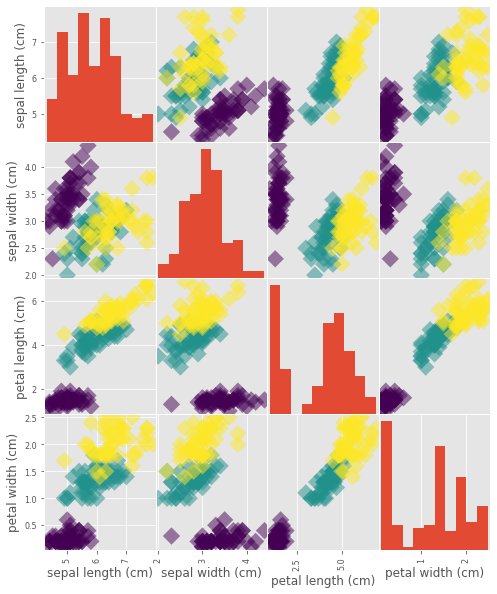

In [9]:
# use a plotting function to create a scatter matrix 
# takes a DataFrame as an argument 
# the parameter c stands for color
# pass in y (the target values in the dataset) to c
# this means data points will be colored by species 
# figsize is a tuple with length and width 
# figsize specifies size of figure including marker size and shape s
# D stands for Diamond shape 
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,10], s=150, marker = 'D')

This scatterplot contains a large amount of information. For example, we can see that petal length and petal width are highly correlated (as would be expected). We can also see that for petal length nad petal width the data points are clustered by species. 

## Supervised Learning 

## k-Nearest Neighbors
Predict the label of a datapoint by looking at k-closest data points and taking a majority vote.<br>
For example, looking at the 2-D scatterplot of petal length and petal width above, we can see how decision boundaries could be drawn so that new data points would be classified based on the labels of their nearest neighbors. 

In sci-kit learn, all machine learning models are implemented as Python classes. The models implement that algorithms for learning and predicting. They also store the information learned from the data. 

In [10]:
# instantiate k-Nearest Negibhors classifier
# wtih k = 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [11]:
# fit this classifier to our training set, 
# the labeled data
# pass the features and target as numpy arrays
# Minkowski distance is a generalization 
# of Euclidean and Manhattan Distance 
# note: this fits to entire dataset 
# should use train/test split or cross validation
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

We can see that the Classifier itself was returned and modified to fit the data. 

Note: to work with sci-kit learn:
+ data as numpy array or pandas dataframe
+ numeric values instead of categorical values 
+ no missing values in the data

In [12]:
# verify that data is in correct format
# to use with sci-kit learn
# there are 150 rows and 4 columns
iris['data'].shape

(150, 4)

In [13]:
# target has 150 rows
# single column 
iris['target'].shape

(150,)

In [14]:
# predict on unlabeled data
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
        [5.7, 2.6, 3.8, 1.3],
        [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)

In [15]:
# check that X_new has necessary shape
# we can see it has 3 rows and 4 columns
# remember we have 4 features:
# sepal length and width, petal length and width
X_new.shape

(3, 4)

In [16]:
# we expect predict to return a 3 x 1 array
# with a predicted label for each observation
# Predicts 1 for versicolor for first two observations
# Predicts 0 for sertosa for third observation 
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Measuring Model Performance 
**Accuracy** is a common metric for classification. We want to know what fraction of predictions are correct. 
<br> 
We could compute the accuracy of the model on the training set, but that would not be indicative of the model's ability to generalize. 

In [17]:
# sklearn train_test_split randomly splits dataset
# into training set and testing set 
# in this case, we are using 30% of the dataset for a test set 
# random_state=21 sets seed 
# this means we can reproduce the exact split and downstream results later
# stratify=y means that labels will be distributed in the train/test datasets
# as they are in the full dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
    random_state=21, stratify=y)

In [18]:
# instantiate k-Nearest Negibhors classifier
# wtih k = 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [19]:
# fit KNN Classifier to training set
# helpful source on Similarity Measure Implementations in Python: 
# https://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [20]:
# store predictions 
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [21]:
# look at the accuracy of the model 
knn.score(X_test, y_test)

0.9555555555555556

Approximately 95% accuracy out of the box is strong performance. 

## Hyperparameter Tuning: Find a Value for K 
Try out different values for k to choose a value that prevents overfitting or underfitting on the training dataset. <br>
A larger k is a smoother decision boundary, a less complex model. <br>
A smaller k is a more complex model. A smaller k can also lead to overfitting. <br>

In [22]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [23]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

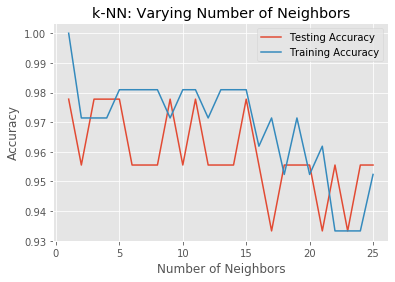

In [24]:
# Generate plot for the model complexity curve 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

With a small k, we would potentially be overfitting to the noise in the data. The model complexity curve shows that accuracy performance on both the training and test datasets decreases as the number of neighbors increases. It looks like there is a sweet spot of 11 neighbors where we could maximize the performance of the model while avoiding overfitting or underfitting.

## Classification Metrics

In [25]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

In [26]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [27]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [28]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In this test set, there were 15 of each Iris type. The overall **accuracy** of the classifier was 96%. The precision and recall for the first Iris type were perfect. For types 1 and 2, 14 out of the 15 were properly classified with 1 confused for the other class. 

## Unsupervised Learning 

+ Unsupervised learning finds patterns in data, e.g. clustering customers by their purchases
+ Compressing the data using purchase patterns (dimension reduction)
<br>
Supervised learning finds patterns for a prediction task. E.g. classify tumors as benign or cancerous (labels). Above, we try to predict the species label for the iris dataset. <br?
Unsupervised learning finds patterns in data but without a specific prediction task in mind. 

The Iris data is 4-dimensional. Dimensions are the number of features. That many dimensions is too high to visualize, but unsupervised learning gives insight. 

## k-means clustering
+ find clusters of samples 
+ number of clusters must be specified 

## Clustering 2D Points

In [29]:
# create KMeans clustering moderl
# specify 3 clusters 
# because there are 3 iris species
model = KMeans(n_clusters=3)

In [30]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
labels = model.predict(X)

In [32]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## Cluster Labels for New Samples

+ New samples can be assigned to existing clusters. 
+ k-means remembers the mean of each cluster ("the centroids") 
+ finds the nearest centroid to each new sample 

In [33]:
new_samples = X[10:13]
print(new_samples)

[[5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]]


In [34]:
new_labels = model.predict(new_samples)
print(new_labels)

[0 0 0]


## Scatter plots 
+ Scatter plot of sepal length vs. petal length 
+ Each point represents an iris sample 
+ Color points by cluster labels 

In [35]:
# sepal length is the 0 column
# of the iris data 
xs = X[:,0]
# petal length is the 2nd column
# of the iris data 
ys = X[:,2]

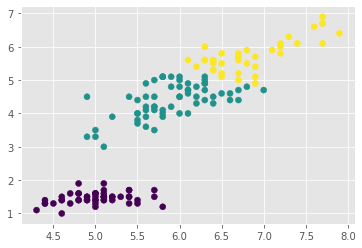

In [36]:
# color by cluster label 
plt.scatter(xs, ys, c=labels)
plt.show()

The scatter plot suggests that there are 3 distinct clusters. 

## Evaluating a Clustering 

+ Can check correspondence with iris species...but what if there are no species to check against? 
+ Measure quality of a clustering 
+ Informs choice of how many clusters to look for 

## Iris Clusters vs. Species 
+ k-means found 3 clusters amongst the iris samples 
+ Do the clusters correspond to the species? 

+ We can see that label 1 corresponds perfectly to the Setosa iris species. 
+ Label 2 is mostly Versicolor species (48), but there are some virginica species (14). 

## Cross tabulation with pandas

+ clusters vs. species is a 'cross-tabulation'

In [38]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
print(type(iris.target))

<class 'numpy.ndarray'>


In [40]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [41]:
# found this in Stack Overflow post: 
# https://stackoverflow.com/questions/9987483/elif-in-list-comprehension-conditionals
# b = ['F' if i > 0.5 else 'M' for i in a]
species = ['setosa' if i == 0 else 'versicolor' if i == 1 else 'virginica' for i in iris.target]

In [42]:
print(species)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

## Aligning Labels and Species 

In [43]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

     labels    species
0         0     setosa
1         0     setosa
2         0     setosa
3         0     setosa
4         0     setosa
..      ...        ...
145       2  virginica
146       1  virginica
147       2  virginica
148       2  virginica
149       1  virginica

[150 rows x 2 columns]


## Crosstab of Labels and Species

In [44]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


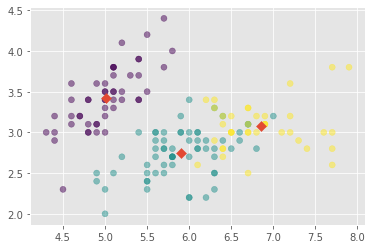

In [45]:
# Assign the columns of new_points: xs and ys
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
# compute the coordinates of centroids 
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


We can see that cluster label 1 perfectly matches the setosa species label. Cluster label 2 mostly corresponds with the virginica species. Cluster Label 0 mostly correspnds with the versicolor species label but also has 14 virginica samples. We can visualize this with the scatterplot above. 

How would we evaluate this clustering if there were no species labels? 

## Measuring clustering quality 
+ Using only samples and their cluster labels
+ A good clustering has tight clusters 
+ Samples in each cluster bunched together 

## Inertia Measures Clustering Quality 
+ Measures how spread out clusters are, lower is better
+ Distance from each sample to the centroid of its cluster
+ After fit(), available as attribute inertia_
+ k-means attempts to minimize inertia when choosing clusters

In [47]:
samples = iris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [48]:
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601


## The Number of Clusters